# Практическая работа 6

## 1 Найти данные для кластеризации. Данные в группе не должны повторяться. Если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать

In [1]:
import pandas as pd
import os

PATH = '/Users/naverigin/PycharmProjects/MireaBigData/pr6/'
file_path = os.path.join(PATH, 'marketing_campaign.csv')

data = pd.read_csv(file_path, sep="\t")
data.info()
data.head()
data.dropna(inplace=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntGoldProds         2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## 2 Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров

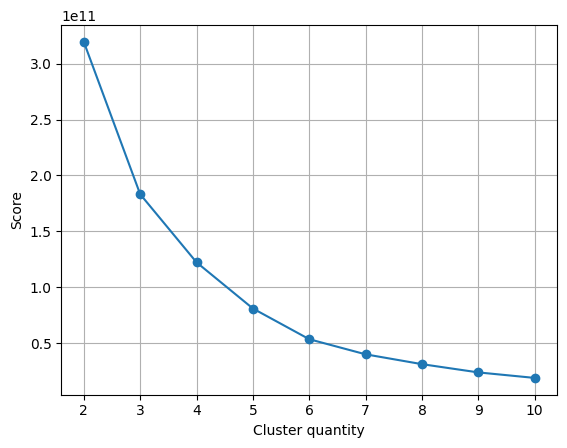

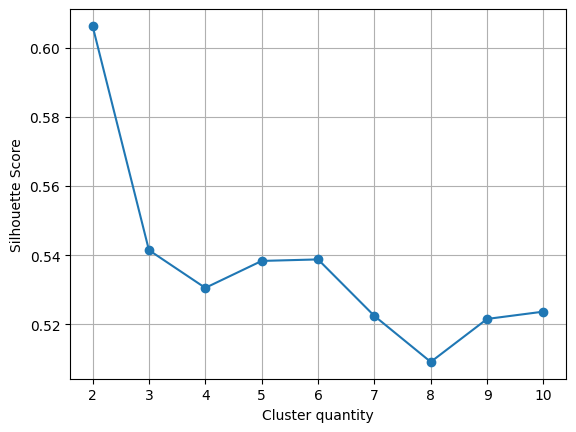

Cluster
5    527
3    497
0    486
1    367
2    331
4      7
Name: count, dtype: int64

In [2]:
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
from sklearn.preprocessing import MaxAbsScaler


def make_plot(xvalues, yvalues, xlabel, ylabel):
    Figure()
    plt.grid()
    plt.plot(xvalues, yvalues, marker="o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

data = data.dropna()
data = data.drop(["Education", "Marital_Status", "ID", "Dt_Customer", "Year_Birth"], axis=1)

models = list()
score = list()
silhouette_scores = list()
for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=111, init="k-means++").fit(data)
    models.append(model)
    score.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data, model.labels_))

make_plot(range(2, 11), score, "Cluster quantity", "Score")
make_plot(range(2, 11), silhouette_scores, "Cluster quantity", "Silhouette Score")

model1 = KMeans(n_clusters=6, random_state=111, init="k-means++")
clustering = model1.fit(data)
data["Cluster"] = clustering.labels_

fig = go.Figure(data=[go.Scatter(x=data["MntWines"],
                                    y=data["Income"],
                                    mode="markers",
                                    marker_color=data["Cluster"]
                                    )])
fig.update_layout(xaxis_title="Amount spent on wine in last 2 years",
                    yaxis_title="Customer's yearly household income")
fig.show()

kmeans = data.copy()
kmeans["Cluster"] = model1.labels_
kmeans["Cluster"].value_counts()

## 3 Провести кластеризацию данных с помощью алгоритма иерархической кластеризации

In [3]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objs as go


model2 = AgglomerativeClustering(n_clusters=6, compute_distances=True)
clustering = model2.fit(data)
data["Cluster"] = clustering.labels_

fig = go.Figure(data=[go.Scatter(x=data["MntWines"],
                                    y=data["Income"],
                                    mode="markers",
                                    marker_color=data["Cluster"]
                                    )])
fig.update_layout(xaxis_title="Amount spent on wine in last 2 years",
                    yaxis_title="Customer's yearly household income")
fig.show()

hierarchy = data.copy()
hierarchy["Cluster"] = model2.labels_
hierarchy["Cluster"].value_counts()

Cluster
0    557
1    524
3    451
2    384
5    292
4      7
Name: count, dtype: int64

## 4 Провести кластеризацию данных с помощью алгоритма DBSCAN

In [4]:
import pandas as pd
from sklearn.cluster import DBSCAN
import plotly.graph_objs as go


model3 = DBSCAN(eps=240, min_samples=5).fit(data)
data["Cluster"] = model3.labels_
fig = go.Figure(data=[go.Scatter(x=data["MntWines"],
                                 y=data["Income"],
                                 mode="markers",
                                 marker_color=data["Cluster"]
                                 )])
fig.update_layout(xaxis_title="Amount spent on wine in last 2 years",
                  yaxis_title="Customer's yearly household income")
fig.show()

dbscan = data.copy()
dbscan["Cluster"] = model3.labels_
dbscan["Cluster"].value_counts()

Cluster
-1     793
 1     753
 0     199
 11     69
 8      51
 2      32
 7      22
 6      20
 26     18
 14     16
 16     15
 9      15
 4      12
 3      11
 27     11
 13     11
 5      10
 18     10
 10      9
 20      8
 36      8
 38      8
 33      7
 32      7
 23      7
 15      6
 22      6
 34      6
 41      6
 17      6
 29      6
 30      5
 24      5
 39      5
 19      5
 35      5
 12      5
 37      5
 40      5
 21      5
 31      5
 25      4
 28      3
Name: count, dtype: int64

## 5 Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если необходимо. Если данные трехмерные, то можно использовать трехмерный точечный график

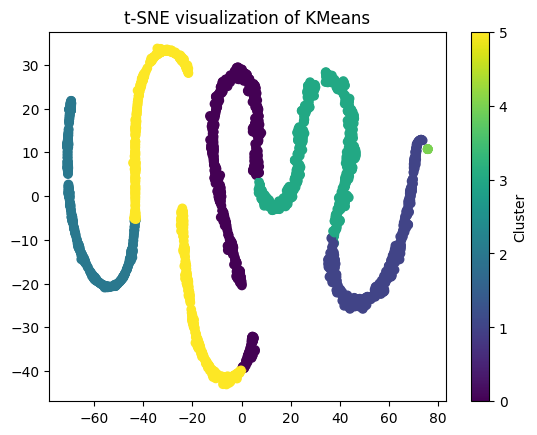

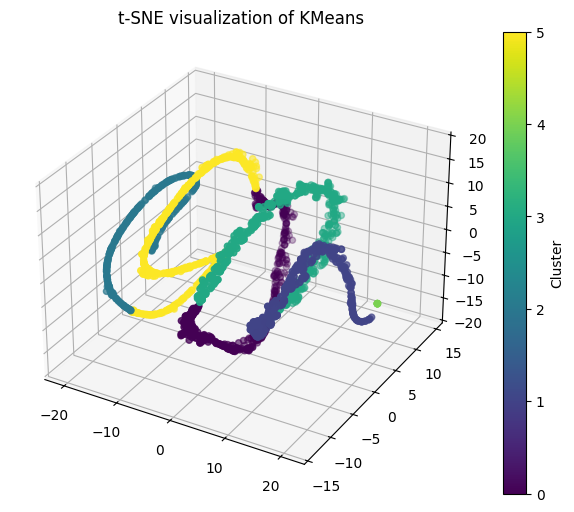

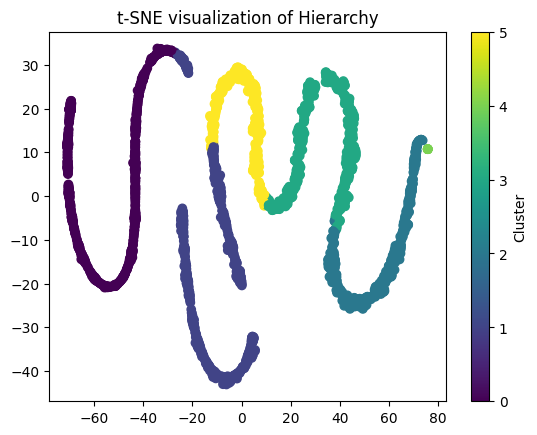

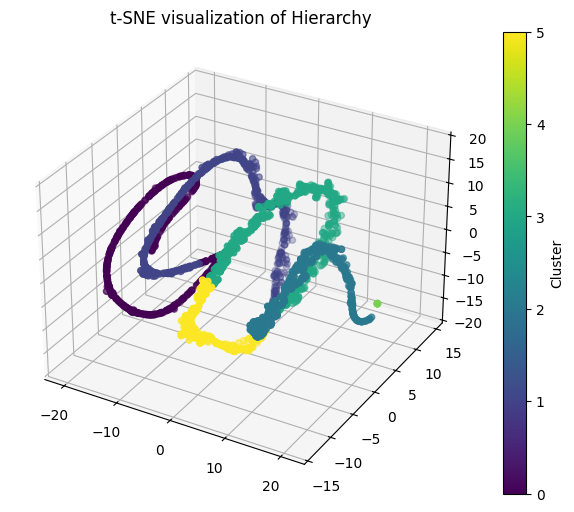

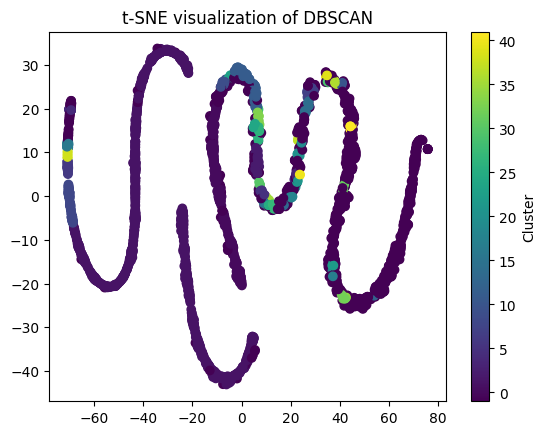

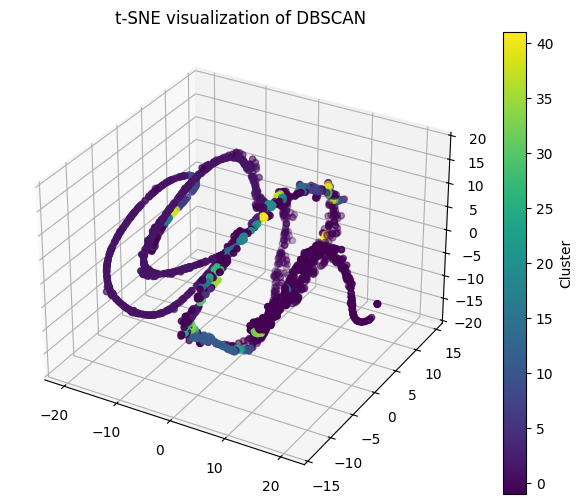

In [5]:
from sklearn.manifold import TSNE
import seaborn as sns

def visualize_clusters(X, labels, algorithm, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=111)

    tsne_results = tsne.fit_transform(X)

    if (n_components == 2):
        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
        plt.colorbar(label='Cluster')
        plt.title(f't-SNE visualization of {algorithm}')
    elif (n_components == 3):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=labels, cmap='viridis')
        plt.colorbar(scatter, ax=ax, label='Cluster')
    
    plt.title(f't-SNE visualization of {algorithm}')
    plt.show()

dimensions = [2, 3]
clusters = [
    {'name': 'KMeans', 'data': kmeans},
    {'name': 'Hierarchy', 'data': hierarchy},
    {'name': 'DBSCAN', 'data': dbscan},
]

for cluster in clusters:
    for dim in dimensions:
        visualize_clusters(data, cluster['data']['Cluster'], cluster['name'], dim)